In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/200.7 MB 4.9 MB/s eta 0:00:27

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
x_train
# 0 -> black and 1 -> white

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

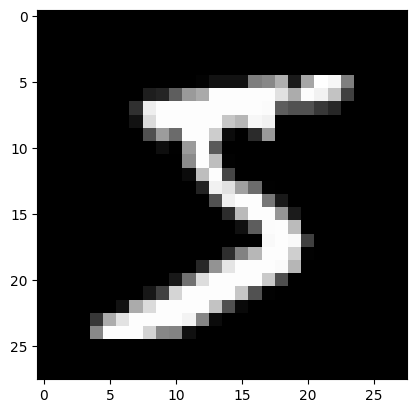

In [12]:
plt.imshow(x_train[0], cmap="gray")

In [13]:
# make all values in between 0->1 instead f 0-> 255
x_train, x_test = x_train / 255.0 , x_test/ 255.0

In [20]:
# 128 is hyper parameter it can be change accordingly to get the better result
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [23]:
# compile the model with three attributes
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              

In [43]:
# train the model and epoch will define at the time of training the model
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9883 - loss: 0.0372
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.9908 - loss: 0.0292
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9934 - loss: 0.0225
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9936 - loss: 0.0201
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.9949 - loss: 0.0168


In [44]:
# evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9765 - loss: 0.0939
Test Accuracy: 97.65%


In [45]:
predictions = model.predict(x_test)
print(predictions)
print('prediction shape -:',predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
[[2.6313360e-10 7.6139033e-11 2.2384000e-07 ... 9.9896848e-01
  5.4265428e-09 2.7010358e-07]
 [3.9287684e-11 6.1162675e-09 9.9999964e-01 ... 2.0195674e-17
  3.4950594e-07 5.5226671e-17]
 [3.2563477e-08 9.9913025e-01 1.5606050e-04 ... 1.5357464e-04
  4.6102941e-04 1.9878943e-08]
 ...
 [1.4916979e-18 9.7115292e-16 5.0530576e-16 ... 2.1964647e-07
  3.4430074e-09 8.8661324e-07]
 [1.4818790e-11 5.4331289e-14 8.4803059e-16 ... 5.5273529e-12
  9.2645159e-06 1.2605853e-17]
 [8.5446628e-09 2.5035561e-17 7.5706781e-11 ... 1.1279241e-18
  2.1044242e-14 7.4017832e-14]]
prediction shape -: (10000, 10)


In [46]:
predictions[0]


array([2.6313360e-10, 7.6139033e-11, 2.2384000e-07, 1.0310079e-03,
       7.0140151e-11, 6.3102180e-12, 9.9063071e-17, 9.9896848e-01,
       5.4265428e-09, 2.7010358e-07], dtype=float32)

In [47]:
print(np.argmax(predictions[0]))

7


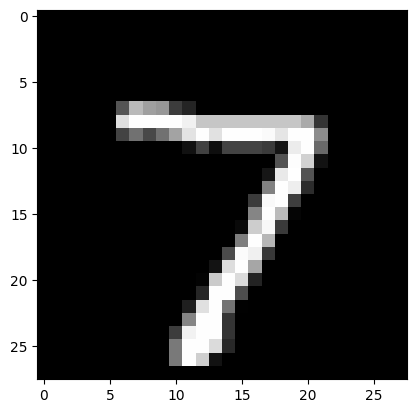

In [48]:
plt.imshow(x_test[0], cmap="gray")

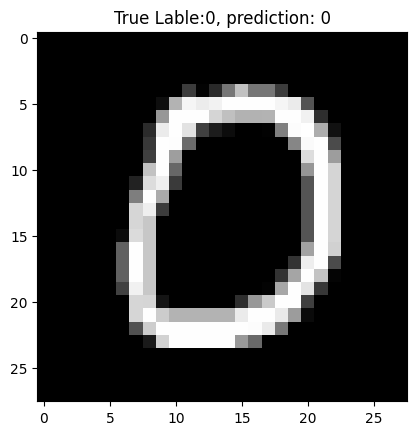

In [49]:
plt.imshow(x_test[10], cmap="gray")
plt.title(f"True Lable:{y_test[10]}, prediction: {np.argmax(predictions[10])}")
plt.show()

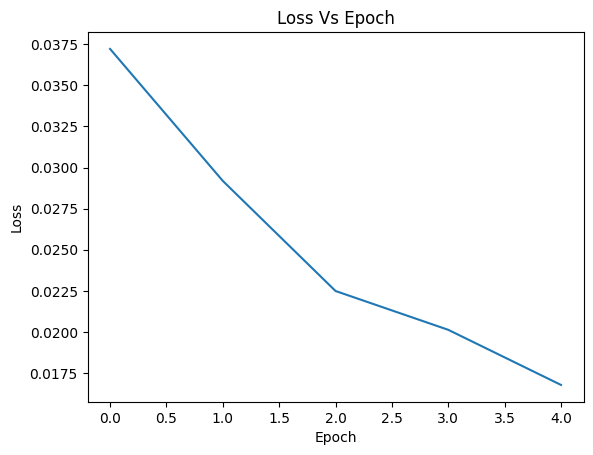

In [52]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Vs Epoch')
plt.show()